In [2]:
**Overview**
The dataset given contains the data collected during a study conducted between 1958 an 1970 at University of Chicago's Billing
Hospital on the survivality of patients who underwent breast cancer treatment.

column |  content         
  1st  :  age of patients  
  2nd  :  year of operation
  3rd  :  positive axillary nodes detected
  4th  :  survival status 
          1 = patient survived 5 or more years after the treatement.
          2 = patient died within 5 years of the treatement.

**Objective**
1. To analyse the dataset and build a model that can predict the survivality of a patient by taking age and number of axillary 
   nodes as input. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# Reading data from haberman.csv dataset
df = pd.read_csv('haberman.csv')

In [4]:
# Getting number of datapoints and attributes 
df.shape

(306, 4)

In [5]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
# Since the dataset lacks column labels . We will read the data by adding column labels.
# Here age = age of patient.
#      year = year of operation.
#      nodes = number of positive axillary nodes detected.(Lymph nodes).
#      status = this shows that a patient was able to survive for more than 5 years or not after the treatment.
df = pd.read_csv('haberman.csv',names=['age','year','nodes','status']) 

In [7]:
# Getting first few datapoints
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
# Here we need labels in the status column instead of integral value .
df['status'].unique()

array([1, 2], dtype=int64)

In [9]:
# Hence we will replace 1 with 'survived' and 2 with 'died'
df['status'] = df['status'].apply(lambda x:'survived' if x==1 else 'died')

In [10]:
df.head()

,age,year,nodes,status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


In [12]:
# Getting the stastical overwiew of the dataset
df.describe()

,age,year,nodes
count,307.000000,307.000000,307.000000
mean,52.384365,62.856678,4.016287
std,10.861674,3.244751,7.179974
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.500000,65.500000,4.000000
max,83.000000,69.000000,52.000000


In [ ]:
**Observations**
1. Min age of patients is 30 and max age is 83 but 75% of the patients are below the age of 60. 
2. Mean age of the patients is below 53 year.
3. 75% of the patients were treated before 1965.
4. 75% of the patients have axillary nodes less than or equal to 4 although tha maximum nodes detected was 52.
5. Moreover 50% of the patients had axillary nodes less than or equal to 1.

In [13]:
# Count the number of patients who survived or died after the treatement.
df['status'].value_counts()

survived    226
died         81
Name: status, dtype: int64

In [ ]:
**Observations**
1. 73.61% of the patients survived and 26.28% of the patients died after 5 years of the treatement.
2. The given data is imbalanced.

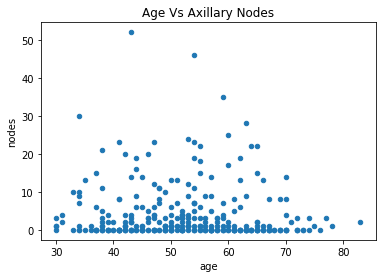

In [14]:
# Multivariate Analysis
df.plot(kind='scatter',x='age',y='nodes')
plt.title('Age Vs Axillary Nodes')
plt.show()

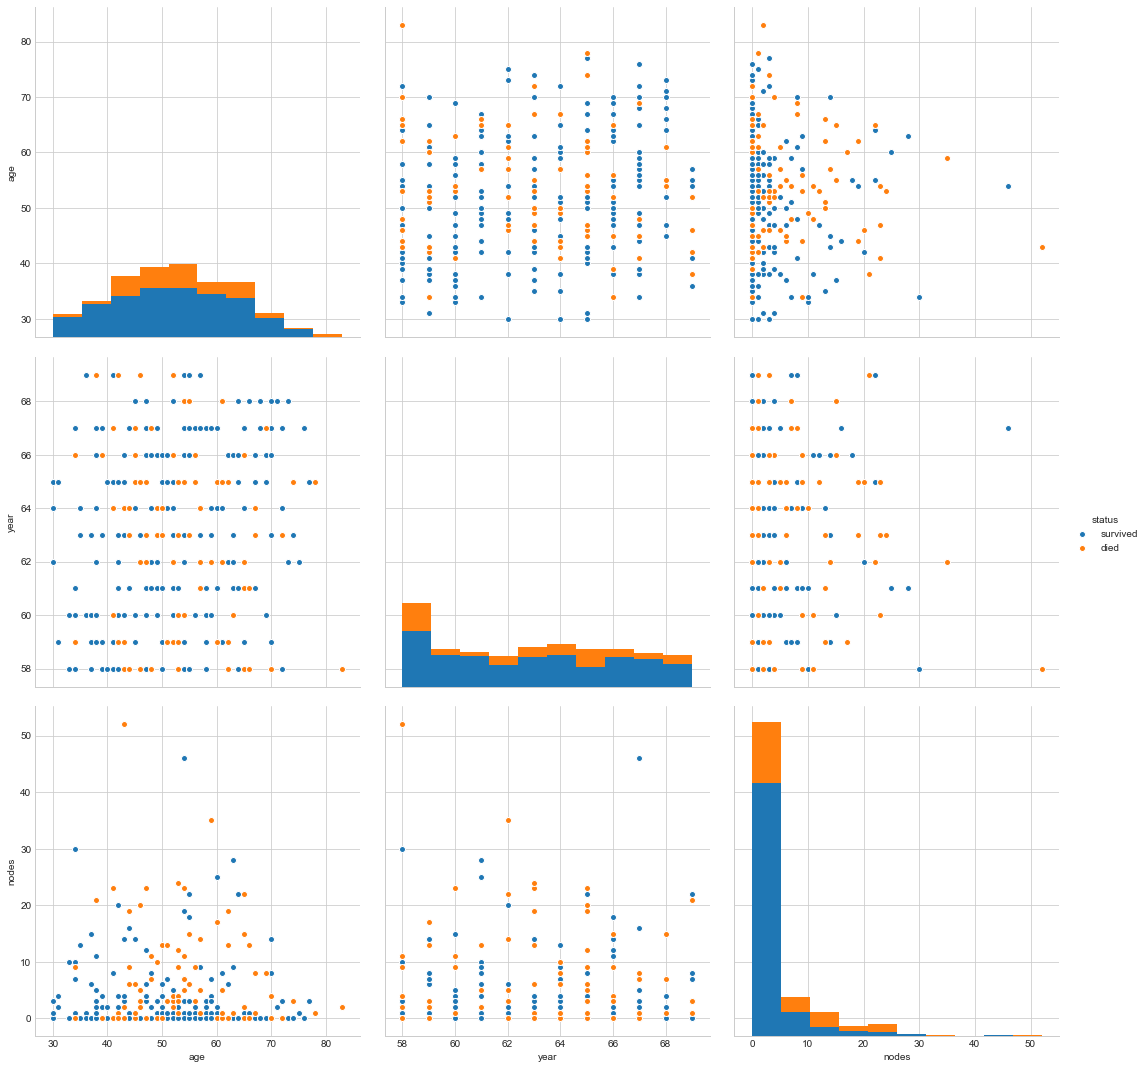

In [15]:
# let us plot some more plots 
sns.set_style('whitegrid');
sns.pairplot(df,hue='status',size=5)
plt.show()

In [ ]:
**Observations**
1. From graph number 2 (age vs nodes ): We can observe that patients of age 40 and below and nodes less than 10 has very high probability of 
                                        survival.
2. From graph number 2 (age vs nodes) : We can observe that patients having age between 50 and 60 having nodes less than 
                                        or equal to 4 have a very high probability of survival

In [16]:
haberman_survived = df.loc[df['status']=='survived'] # Patients who survived 5 years or more.
haberman_died = df.loc[df['status']=='died'] # Patients who counld't survive 5 years.

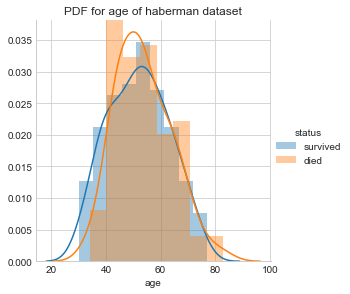

In [125]:
plt.close();
sns.set_style('whitegrid');
sns.FacetGrid(df,hue='status',size=4) \
   .map(sns.distplot,'age') \
   .add_legend();
plt.title('PDF for age of haberman dataset')
plt.show()

In [ ]:
**Observation**
1. The pdf of class haberman_survived and haberman_died are highly overlapped.

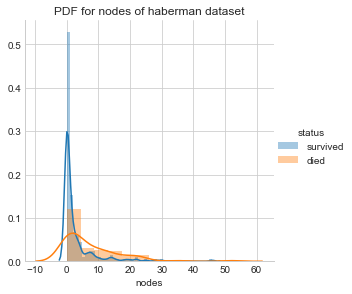

In [124]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',size=4) \
   .map(sns.distplot,'nodes') \
   .add_legend();
plt.title('PDF for nodes of haberman dataset')
plt.show()

In [ ]:
**Observation**
1. The pdf of class haberman_survived and haberman_died are highly overlapped and we cannot infer much from this plot.

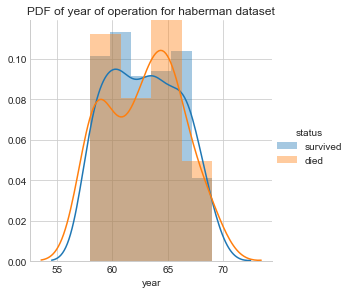

In [17]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',size=4) \
   .map(sns.distplot,'year') \
   .add_legend();
plt.title('PDF of year of operation for haberman dataset')
plt.show()

In [ ]:
**Observation**
1. The pdf of class haberman_survived and haberman_died are highly overlapped.

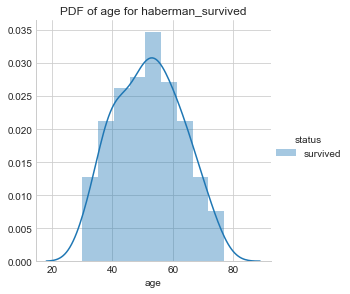

In [61]:
# Univariate analysis for class haberman_survived
# HISTOGRAM , PDFs 
sns.set_style('whitegrid')
sns.FacetGrid(haberman_survived,hue='status',size=4) \
   .map(sns.distplot,'age') \
   .add_legend();
plt.title('PDF of age for haberman_survived')
plt.show()



In [ ]:
**observations**
1. Maximum number of patients who survived the operation were of age between 40 and 60.
2. No patient survived for more than 5 years whose age is more than 77 years.

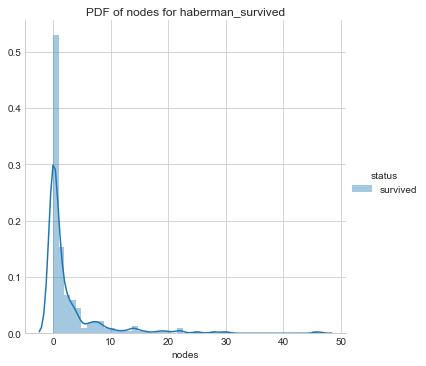

In [168]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman_survived,hue='status',size=5) \
   .map(sns.distplot,'nodes') \
   .add_legend();
plt.title('PDF of nodes for haberman_survived')
plt.show()

In [ ]:
**observations**
1. Maximum number of patients who survived the operation had nodes less than 5.

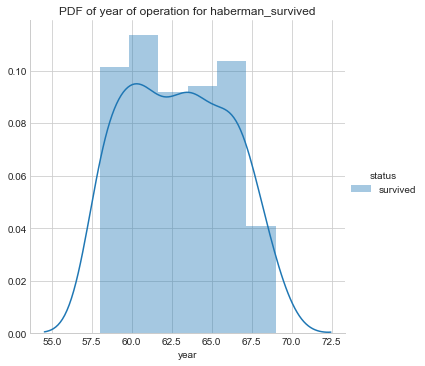

In [169]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman_survived,hue='status',size=5) \
   .map(sns.distplot,'year') \
   .add_legend();
plt.title('PDF of year of operation for haberman_survived')
plt.show()

In [ ]:
**Observation**
1. The year of operation does not play any significant role in the survival of the patients.

[0.05752212 0.10619469 0.12389381 0.09292035 0.16371681 0.16371681
 0.09292035 0.11061947 0.0619469  0.02654867]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


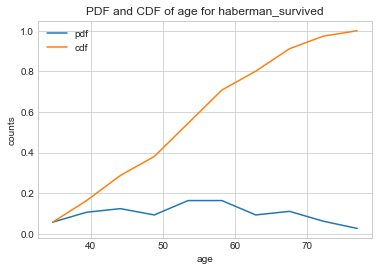

In [149]:
# PDFs , CDFs For class haberman_survived
haberman_survived=haberman_survived.sort_values(['age']) # sorted the dataset on age 

counts,bin_edges = np.histogram(haberman_survived['age'],bins=10,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('age')
plt.ylabel('counts')
plt.title('PDF and CDF of age for haberman_survived')
plt.legend(['pdf','cdf'])  # This takes a list as argument (each for pdf and cdf)
plt.show()



In [ ]:
**Observation**
1. 50% of the patients who survived for 5 or more years are less than 54 years of age and 75% are below 58 years of age.

[0.83628319 0.07964602 0.02212389 0.02654867 0.01769912 0.00442478
 0.00884956 0.         0.         0.00442478]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


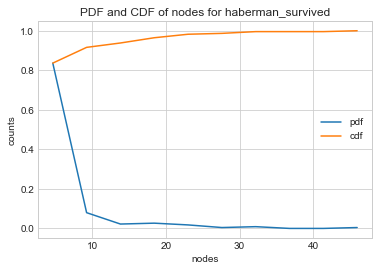

In [46]:
# CDF and PDF of axillary nodes
haberman_survived=haberman_survived.sort_values(['nodes']); # sorted the dataset on axillary nodes 

counts,bin_edges = np.histogram(haberman_survived['nodes'],bins=10,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('nodes')
plt.ylabel('counts')
plt.title('PDF and CDF of nodes for haberman_survived')
plt.legend(['pdf','cdf'])
plt.show()

In [ ]:
**Observations**
1. 82% of the patients who survived for 5 or more years had nodes less than 4.
2. More than 95% of the patients who survived for 5 or more years had number of nodes less than 9.

[0.18584071 0.10619469 0.10176991 0.07079646 0.09734513 0.10619469
 0.06637168 0.09734513 0.09292035 0.07522124]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


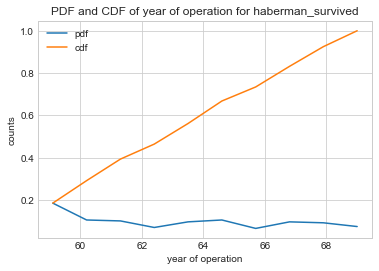

In [157]:
# PDF , CDF of age of operation.
haberman_survived=haberman_survived.sort_values(['year']); # sorted the dataset on axillary nodes 

counts,bin_edges = np.histogram(haberman_survived['year'],bins=10,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('year of operation')
plt.ylabel('counts')
plt.title('PDF and CDF of year of operation for haberman_survived')
plt.legend(['pdf','cdf'])
plt.show()



In [69]:
###### Medians,Quantiles,Percentiles,MAD

print("Medians:")
print('***************')
print("Median age of all the patients",np.median(df['age']))
print("Median nodes of all the patients",np.median(df['nodes']))
print("Median age of all the patients who survived for 5 or more years",np.median(haberman_survived['age']))
print("Median nodes of all the patients who survived for 5 or more years",np.median(haberman_survived['nodes']))
print("Median age of all the patients who died within 5 years",np.median(haberman_died['age']))
print("Median node of all the patients who died within 5 years",np.median(haberman_died['nodes']))

print("***************")
print("Quantiles")
print("***************")
print("Quantile age of all the patients",np.percentile(df['age'],np.arange(0,100,25)))
print("Quantile node of all the patients",np.percentile(df['nodes'],np.arange(0,100,25)))
print("Quantile age of patients who survived for 5 or more years",np.percentile(haberman_survived['age'],np.arange(0,100,25)))
print("Quantile node of patients who survived 5 or more years",np.percentile(haberman_survived['nodes'],np.arange(0,100,25)))
print("Quantile age of patients who died within 5 years",np.percentile(haberman_died['age'],np.arange(0,100,25)))
print("Quantile node of patients who died within 5 years ",np.percentile(df['nodes'],np.arange(0,100,25)))

print("***************")
print("Percentiles")
print("***************")
print("90 percentile age of all patients",np.percentile(df['age'],90))
print("90 percentile node of all patients",np.percentile(df['nodes'],90))
print("90 percentile age of patients who survived 5 or more years",np.percentile(haberman_survived['age'],90))
print("90 percentile node of patients who survived 5 or more years",np.percentile(haberman_survived['nodes'],90))
print("90 percentile age of patients who died within 5 years",np.percentile(haberman_died['age'],90))
print("90 percentile age of patients who died within 5 years",np.percentile(haberman_died['nodes'],90))

print("***************")
print("Median Absolute Deviation") # MAD = (median of ((1/n)summation(x-median)))^2
print("***************")
from statsmodels import robust
print("MAD of age of all the patients",robust.mad(df['age']))
print("MAD of nodes of all the patients",robust.mad(df['nodes']))
print("MAD of age of all the patients who survived for 5 or more years",robust.mad(haberman_survived['age']))
print("MAD of nodes of all the patients who survived for 5 or more years",robust.mad(haberman_survived['nodes']))
print("MAD of age of all the patients who died within5 years",robust.mad(haberman_died['age']))
print("MAD of age of all the patients who died within 5 years",robust.mad(haberman_died['nodes']))

Medians:
***************
Median age of all the patients 52.0
Median nodes of all the patients 1.0
Median age of all the patients who survived for 5 or more years 52.0
Median nodes of all the patients who survived for 5 or more years 0.0
Median age of all the patients who died within 5 years 53.0
Median node of all the patients who died within 5 years 4.0
***************
Quantiles
***************
Quantile age of all the patients [30.  44.  52.  60.5]
Quantile node of all the patients [0. 0. 1. 4.]
Quantile age of patients who survived for 5 or more years [30. 43. 52. 60.]
Quantile node of patients who survived 5 or more years [0. 0. 0. 3.]
Quantile age of patients who died within 5 years [34. 46. 53. 61.]
Quantile node of patients who died within 5 years  [0. 0. 1. 4.]
***************
Percentiles
***************
90 percentile age of all patients 67.0
90 percentile node of all patients 13.0
90 percentile age of patients who survived 5 or more years 67.0
90 percentile node of patients who

In [ ]:
**Observations**
1.50% of all the patients are below the age of 52.
2.50% of all the patients have nodes below or equal to 1.
3.All the patient of age below 34 survived.
4.90% of the patients who survived had node less than or equal to 8.

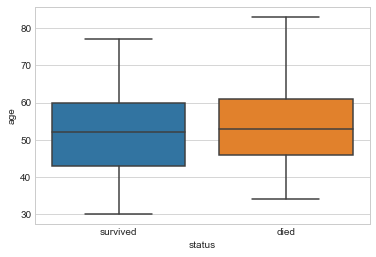

In [173]:
# BOX PLOT WITH WHISKERS FOR haberman dataset

sns.boxplot(x='status',y='age',data=df)
plt.show()

In [ ]:
**Observations**
1. 50% of the patients who survived were having between 42 and 60.
2. 50% of the patients who died were having age between 46 and 62.
3. None of the patients died who had age less than 34.

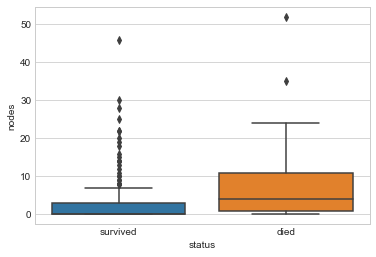

In [54]:
sns.boxplot(x='status',y='nodes',data=df)
plt.show()

In [57]:
print("Number of patients having zero nodes : {}".format(len(df[df['nodes']==0])))
print("Number of patients having nodes less than 10 : {}".format(len(df[df['nodes']<10])))

Number of patients having zero nodes : 136
Number of patients having nodes less than 10 : 264


In [ ]:
**Observations**
1.44% of the patients have zero positive axillary nodes.
2.86.2% of the patients have positive axillary nodes less than 10. 

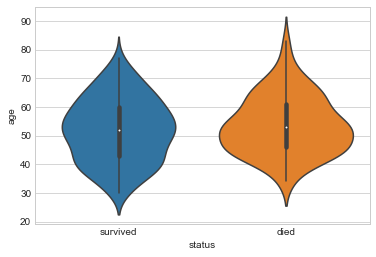

In [62]:
# Violin Plots
sns.violinplot(x='status',y='age',data=df,size=8)
plt.show()

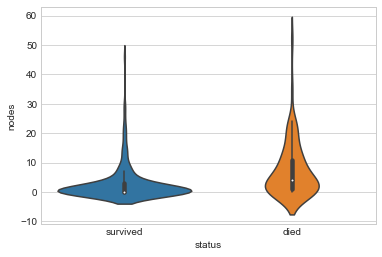

In [63]:
sns.violinplot(x='status',y='nodes',data=df,size=8)
plt.show()

In [ ]:
**Observation**
1. Not much useful for classification.

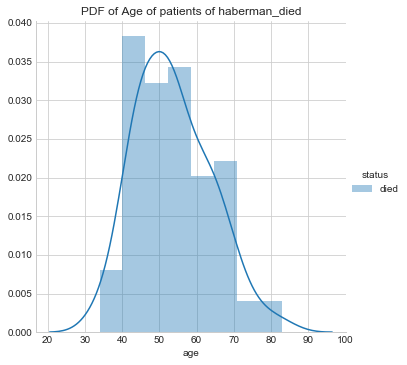

In [51]:
# Haberman_died class analysis
sns.set_style('whitegrid')
sns.FacetGrid(haberman_died,hue='status',size=5) \
   .map(sns.distplot,'age') \
   .add_legend();
plt.title("PDF of Age of patients of haberman_died")
plt.show()

In [ ]:
**Observation**
1. None of the patients having age less than 34 died within 5 years of the treatement.

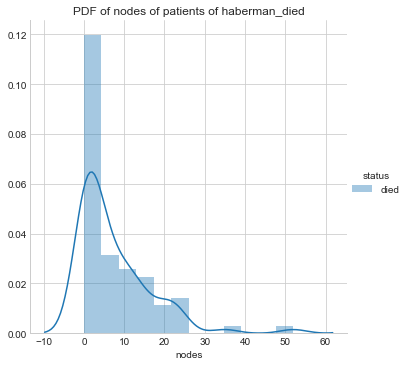

In [52]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman_died,hue='status',size=5) \
   .map(sns.distplot,'nodes') \
   .add_legend();
plt.title("PDF of nodes of patients of haberman_died")
plt.show()

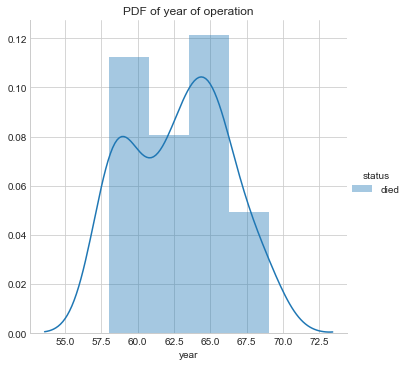

In [53]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman_died,hue='status',size=5) \
   .map(sns.distplot,'year') \
   .add_legend();
plt.title("PDF of year of operation")
plt.show()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


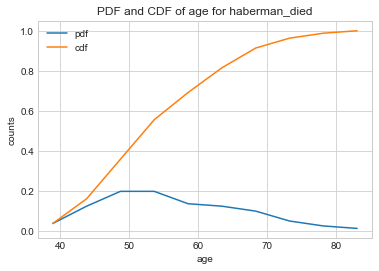

In [58]:
# PDFs , CDFs For class haberman_died
haberman_died=haberman_died.sort_values(['age']) # sorted the dataset on age 

counts,bin_edges = np.histogram(haberman_died['age'],bins=10,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('age')
plt.ylabel('counts')
plt.title('PDF and CDF of age for haberman_died')
plt.legend(['pdf','cdf'])  # This takes a list as argument (each for pdf and cdf)
plt.show()


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


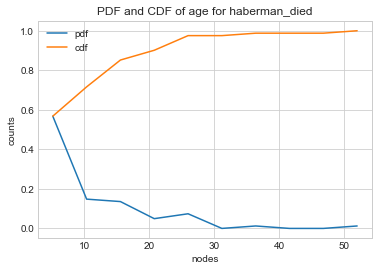

In [59]:
# PDFs , CDFs For class haberman_died
haberman_died=haberman_died.sort_values(['nodes']) # sorted the dataset on nodes 

counts,bin_edges = np.histogram(haberman_died['nodes'],bins=10,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('nodes')
plt.ylabel('counts')
plt.title('PDF and CDF of age for haberman_died')
plt.legend(['pdf','cdf'])  # This takes a list as argument (each for pdf and cdf)
plt.show()


[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


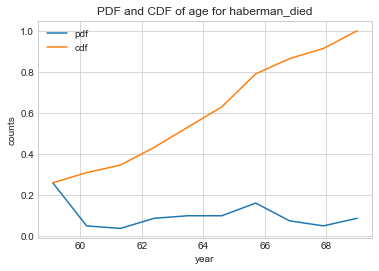

In [60]:
# PDFs , CDFs For class haberman_died
haberman_died=haberman_died.sort_values(['year']) # sorted the dataset on year 

counts,bin_edges = np.histogram(haberman_died['year'],bins=10,density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('year')
plt.ylabel('counts')
plt.title('PDF and CDF of age for haberman_died')
plt.legend(['pdf','cdf'])  # This takes a list as argument (each for pdf and cdf)
plt.show()


In [33]:
# We will move proceed our analysis based on the results abtained from scatter plots.
# Now we will focus on age group of less than 40 and between 50 and 60.
# We will also focus on analysing the number of nodes of these age group patients.
haberman_below_40 = df.loc[df['age']<=40]

In [35]:
haberman_below_40['status'].value_counts()

survived    40
died         4
Name: status, dtype: int64

In [ ]:
**Observations**
1. 90.90% of the patient having age <=40  survived for more than 5 years.
2. 9.10% of the patients having age <=40 died within 5 years of the  treatement.

In [77]:
# Collecting datapoints having age less than or equal to 40 and node less than 3
haberman_below_40_nodes_below_3 = haberman_below_40.loc[df['nodes']<3]

In [78]:
haberman_below_40_nodes_below_3['status'].value_counts()

survived    27
died         2
Name: status, dtype: int64

In [ ]:
**Observation**
1. 93.10% of the patients having age <= 40 and nodes < 3  survived for more than 5 years.
2. 6.90% of patients having age <=40 and nodes <3 died within 5 years of the treatement.

In [53]:
# Patients between 50 and 60 years of age 
haberman_betw_50_60 = df.loc[60 - df['age']<=10]

In [55]:
haberman_betw_50_60['nodes'].value_counts()

0     83
1     26
3     13
2     10
4      7
7      5
9      4
5      4
8      4
13     4
6      3
22     3
15     2
14     2
19     2
35     1
12     1
11     1
17     1
18     1
23     1
24     1
25     1
28     1
46     1
Name: nodes, dtype: int64

In [ ]:
**Observations**
1. 67.03% of patients having age between 50 an 60 have nodes lesss than or equal to 3.

In [97]:
haberman_betw_50_60['status'].value_counts()

survived    132
died         50
Name: status, dtype: int64

In [ ]:
**Observations**
1. 75.52% of the patients between the age of 50 and 60 survived for 5 or more years after the treatement.
2. 24.48% of the patients bbetween the age of 50 and 60 died within 5 years of the treatement.

In [79]:
#Patients of age between 50 and 60 and having nodes lasss than 3
haberman_betw_50_60_nodes_below_3 = haberman_betw_50_60.loc[haberman_betw_50_60['nodes']<3]

In [80]:
haberman_betw_50_60_nodes_below_3['status'].value_counts()

survived    102
died         17
Name: status, dtype: int64

In [ ]:
**Observations**
1. 85.71% of the patients between the age 50 and 60 survived if the patients have less than 3 nodes.
2. 14.29% of the patients between the age 50 and 60 died if they have 3 or more nodes . 

In [38]:
df['nodes'].value_counts()

0     136
1      42
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

In [71]:
# Since max patients had nodes less than or equal to 3
# We will find how many patients out of this survived 
haberman_nodes_below_4 = df[df['nodes']<4]

In [72]:
haberman_nodes_below_4['status'].value_counts()

survived    179
died         39
Name: status, dtype: int64

In [ ]:
**Observations**
1. 82.11% of the patients having nodes less than 4 survived and rest 17.89% died.


In [ ]:
###### Conclusion =======>
1. The given data is imbalanced as 73.5% of datapoints belong to class1(survived) and 26.5% to class2(died).
2. 75% of the patients have age less than 60 although max age is 83.
3. 75% of the patients have axillary nodes less than 4.
4. 44% of the patients have 0 axillary nodes and 86.2% have less than 10
   axillary nodes although max nodes detected was 52.
5. 90.90% of the patients having age <=40 survived for more than 5 years.
6. 93.10% of the patients having age <=40 and nodes <=3 survived for more than 5 years.
7. All the patients survived for 5or more years who had age less than 34.
8. 85.71% of the patients having age >=50 and age <=60 and axillary nodes <3
   survived for more than 5 years.

In [70]:
# Now we will make a simple model to predict the survivability of the patients undergoing treatement

def predict_survivality(age,year,nodes):
    '''This function predicts that whether a patient
       will survive for 5 or more years after the treatement is 
       done or not.'''
    if age<34: # 100% accuracy
        return 'Patient will survive'
    if age<=40:   # 90.90% accuracy
        if nodes < 3:  #93.10% accuracy
            return 'Patient will survive for 5 or more years'
        else:
            return 'Patient may or may not survive for 5 or more year'
    elif age>=50 and age<=60: # 75.52% accuracy
        if nodes <3:           # 85.71% accuracy
            return 'Patient will survive for 5 or more years'
        else:
            return 'Patient may or may not survive for 5 years'
    else:
        return 'Patient may or may not survive for 5 or more years'
    
predict_survivality(32,71,3)


'Patient will survive'